### Construyendo un Chatbot Con Múltiples Herramientas Usando Langgraph

#### Objetivo
Crear un chatbot con capacidades de herramientas de arxiv, búsqueda en wikipedia y algunas funciones

In [1]:
# Importamos herramientas para consultar Arxiv (repositorio de papers científicos)
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
# Importamos los wrappers de API para Wikipedia y Arxiv
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
# Configuramos el wrapper de la API de Arxiv
# top_k_results=2: devuelve los 2 mejores resultados
# doc_content_chars_max=500: limita el contenido a 500 caracteres
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
# Creamos la herramienta de búsqueda de Arxiv usando el wrapper configurado
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
# Imprimimos el nombre de la herramienta
print(arxiv.name)

arxiv


In [3]:
# Invocamos la herramienta de Arxiv con una búsqueda del famoso paper "Attention is All You Need"
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [4]:
# Configuramos el wrapper de la API de Wikipedia
# top_k_results=1: devuelve solo el mejor resultado
# doc_content_chars_max=500: limita el contenido a 500 caracteres
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
# Creamos la herramienta de búsqueda de Wikipedia usando el wrapper configurado
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
# Mostramos el nombre de la herramienta
wiki.name

'wikipedia'

In [5]:
# Invocamos la herramienta de Wikipedia con una consulta sobre machine learning
wiki.invoke("¿Qué es machine learning?")

'Page: Ideogram (text-to-image model)\nSummary: Ideogram is a freemium text-to-image model developed by Ideogram, Inc. using deep learning methodologies to generate digital images from natural language descriptions known as prompts. The model is capable of generating legible text in the images compared to other text-to-image models.\n\n'

In [7]:
# Importamos load_dotenv para cargar variables de entorno
from dotenv import load_dotenv
# Cargamos las variables de entorno desde el archivo .env
load_dotenv()

# Importamos os para gestionar variables de entorno
import os

# Configuramos la API key de Tavily (herramienta de búsqueda web)
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
# Configuramos la API key de GROQ
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [8]:
### Herramienta de Búsqueda Tavily
# Importamos TavilySearchResults, una herramienta de búsqueda web optimizada para LLMs
from langchain_community.tools.tavily_search import TavilySearchResults

# Inicializamos la herramienta de búsqueda Tavily
tavily = TavilySearchResults()

C:\Users\raule\AppData\Local\Temp\ipykernel_26924\585581067.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [10]:
# Invocamos Tavily con una búsqueda de noticias recientes de IA
tavily.invoke("Proporcióname las noticias recientes de IA del 11 de octube de 2025")

[{'title': 'Noticias del día 11 de octubre de 2025 - Cinco Días',
  'url': 'https://cincodias.elpais.com/hemeroteca/2025-10-11/',
  'content': 'Julián Fernández lanzó su primer satélite a los 16 años. A los 22 dirige una empresa con la que pretende dar conectividad segura a ejércitos y a compañías con activos en zonas remotas\n\n## Inteligencia artificial: ¿es oro todo lo que reluce?\n\nIncluir firmas del ramo es razonable, pero hay que equilibrarlo con activos en sectores defensivos\n\n## No existe tal cosa como una burbuja ‘buena’\n\nLa economía está peor preparada para el estallido de la inversión en IA que cuando lo hicieron las puntocom [...] Cinco Días\n\n# 11 de octubre de 2025\n\n## Este truco para el iPhone te permite escribir mucho más rápido con el móvil\n\nConseguirás esto sin perder ni un ápice de precisión y, por lo tanto, serás mucho más eficiente a la hora de escribir un correo e, incluso, al mandar mensajes por redes sociales.\n\n## El niño prodigio de los satélites es

In [11]:
### Combinamos todas las herramientas en una lista

# Creamos una lista con todas las herramientas disponibles
# arxiv: para buscar papers científicos
# wiki: para buscar información enciclopédica
# tavily: para buscar noticias y contenido web actual
tools=[arxiv,wiki,tavily]

In [12]:
## Inicializamos nuestro modelo LLM

# Importamos ChatGroq para usar modelos de chat de Groq
from langchain_groq import ChatGroq

# Inicializamos el modelo de lenguaje con llama-3.1-8b-instant
llm=ChatGroq(model="llama-3.1-8b-instant")

# Vinculamos todas las herramientas al modelo
# Esto permite que el LLM sepa qué herramientas tiene disponibles y cuándo usarlas
llm_with_tools=llm.bind_tools(tools)

c:\Udemy\RAGBootcamp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Importamos pprint para impresión formateada
from pprint import pprint
# Importamos tipos de mensajes de LangChain
from langchain_core.messages import AIMessage, HumanMessage
# Invocamos el LLM con una pregunta sobre noticias de IA
# El modelo decidirá automáticamente qué herramienta usar (en este caso, Tavily)
llm_with_tools.invoke([HumanMessage(content=f"¿Cuáles son las noticias recientes de IA?")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '18zbv9hjj', 'function': {'arguments': '{"query":"noticias recientes de IA"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 559, 'total_tokens': 582, 'completion_time': 0.050017785, 'prompt_time': 0.058124107, 'queue_time': 0.24069536, 'total_time': 0.108141892}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bef75e7e-ded7-48d7-bc23-483018443886-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'noticias recientes de IA'}, 'id': '18zbv9hjj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 559, 'output_tokens': 23, 'total_tokens': 582})

In [14]:
# Accedemos a las llamadas de herramientas que el modelo decidió hacer
# Veremos que eligió usar tavily_search_results_json para buscar noticias recientes
llm_with_tools.invoke([HumanMessage(content=f"¿Cuáles son las noticias recientes de IA?")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'noticias recientes de IA'},
  'id': 'xqfbzvgz1',
  'type': 'tool_call'}]

In [15]:
## Esquema de Estado
# Importamos TypedDict para definir la estructura del estado
from typing_extensions import TypedDict
# Importamos AnyMessage que puede ser cualquier tipo de mensaje
from langchain_core.messages import AnyMessage
# Importamos Annotated para agregar metadatos a los tipos
from typing import Annotated
# Importamos add_messages para agregar mensajes en lugar de sobrescribirlos
from langgraph.graph.message import add_messages
# Definimos el esquema de estado con messages anotado con add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

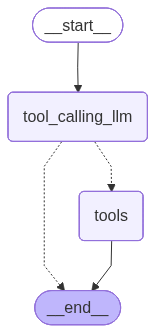

In [16]:
### Chatbot Completo Con LangGraph
# Importamos Image y display para visualizar el grafo
from IPython.display import Image, display
# Importamos componentes de LangGraph
from langgraph.graph import StateGraph, START, END
# Importamos ToolNode para ejecutar herramientas
from langgraph.prebuilt import ToolNode
# Importamos tools_condition para enrutamiento condicional
from langgraph.prebuilt import tools_condition

### Definición del nodo
# Definimos la función que llama al LLM con herramientas
def tool_calling_llm(state:State):
    # Invocamos el LLM con los mensajes del estado
    # El LLM decidirá si necesita llamar a alguna herramienta
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Construimos el grafo
builder = StateGraph(State)
# Agregamos el nodo que llama al LLM con herramientas
builder.add_node("tool_calling_llm", tool_calling_llm)
# Agregamos el nodo que ejecuta las herramientas (arxiv, wiki, tavily)
builder.add_node("tools", ToolNode(tools))

# Conectamos START al nodo tool_calling_llm
builder.add_edge(START, "tool_calling_llm")
# Agregamos aristas condicionales desde tool_calling_llm
builder.add_conditional_edges(
    "tool_calling_llm",
    # Si el último mensaje del asistente es una llamada a herramienta -> enruta a tools
    # Si el último mensaje del asistente NO es una llamada a herramienta -> enruta a END
    tools_condition,
)
# Conectamos tools a END después de ejecutar la herramienta
builder.add_edge("tools", END)

# Compilamos el grafo
graph = builder.compile()

# Visualizamos el grafo
display(Image(graph.get_graph().draw_mermaid_png()))


In [17]:
# Invocamos el grafo con un número de paper de Arxiv (1706.03762 = "Attention is All You Need")
# El LLM detectará que debe usar la herramienta arxiv para buscar este paper
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
# Iteramos sobre todos los mensajes y los imprimimos
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (hzcr78tbz)
 Call ID: hzcr78tbz
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [18]:
# Invocamos el grafo con una pregunta sobre noticias recientes de IA
# El LLM detectará que debe usar la herramienta tavily para buscar noticias actuales
messages=graph.invoke({"messages":HumanMessage(content="Proporcióname las 10 noticias más recientes de IA del 3 de marzo de 2025")})
# Iteramos sobre todos los mensajes (pregunta, llamada a herramienta y resultados)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Proporcióname las 10 noticias más recientes de IA del 3 de marzo de 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (agmc552ng)
 Call ID: agmc552ng
  Args:
    query: IA noticias 3 marzo 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "¿Cómo podemos llevar la IA al límite de lo posible?", "url": "https://es.weforum.org/stories/2025/03/how-can-we-take-ai-to-the-edge-of-possibility/", "content": "Tecnologías emergentes\n\n# ¿Cómo podemos llevar la IA al límite de lo posible?\n\nLa IA sigue estando subutilizada: Cumbre de Acción sobre Inteligencia Artificial en París, 2025.Image: REUTERS/Aurelien Morissard\n\n##### Cathy Li\n\nHead, Centre for AI Excellence; Member of the Executive Committee, World Economic Forum\n\n##### Andrew Caruana Galizia\n\nH

In [19]:
# Invocamos el grafo con una pregunta sobre machine learning
# El LLM detectará que debe usar la herramienta wikipedia para obtener información enciclopédica
messages=graph.invoke({"messages":HumanMessage(content="¿Qué es machine learning?")})
# Iteramos sobre todos los mensajes y los imprimimos
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

¿Qué es machine learning?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (vprx3fbsy)
 Call ID: vprx3fbsy
  Args:
    query: Machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
